## 8<sup>th</sup> of April, 2020
## Benjamin Adam Catching
## Coronavirus Simulation
## Andino Lab 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
sns.set(style="ticks")

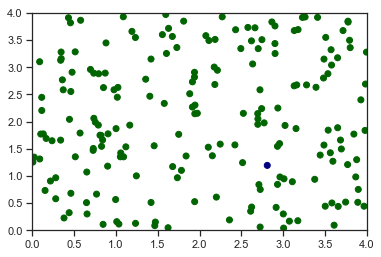

In [5]:
# Fixing random state for reproducibility
np.random.seed(100)

# Number of steps
N_steps = 200
# Number of agents
n_agents = 200
# Set delta t
dt = .1
# Set velocity
velo = .2
# Set boundaries
xboundaries = [0, 4]
yboundaries = [0, 4]
xmax, ymax = xboundaries[1], yboundaries[1]

# Define the figure
fig = plt.figure()
ax = plt.axes(xlim=(0, xmax), ylim=(0, ymax))

# lists to store x and y axis points 
agents = np.zeros(n_agents, dtype=[('position', float, 2),
                                  ('velocity', float, 2),
                                  ('color', str, 20),
                                  ('state', str, 20),
                                  ('time', int, 1)])

# Define the initial positions
agents['position'] = np.random.uniform(0, 4, (n_agents, 2))
# Define the initial angles
init_angles = np.random.uniform(0, 2 * np.pi, n_agents)
# Get initial x and y velocities from angles
velocities = np.array([[np.sin(x), np.cos(x)] for x in init_angles]) * velo
agents['velocity'] = velocities
agents['color'] = np.array(['Navy'] * n_agents)
agents['state'] = np.array(['Susceptible'] * n_agents)
agents['time'] = np.array([0] * n_agents)

# Make the one infected
agents['color'][0] = 'Firebrick'
agents['state'][0] = 'Infected'
agents['time'][0] = 1
# Initialize the plot
scatter = ax.scatter(agents['position'][:, 0], agents['position'][:, 1], color=agents['color'])
num_infected = [sum(agents['state']=='Infected')]
num_recovered = [0]
def update(i):
    # Define the new time
    t = i * dt + dt
    for j in range(n_agents):
        if agents['time'][j] != 0:
            if agents['state'][j] == 'Infected' and agents['time'][j] >= 200:
                agents['state'][j] = 'Recovered'
                agents['color'][j] = 'Darkgreen'
                agents['time'][j] = 0
            elif agents['state'][j] == 'Infected':
                agents['time'][j] += 1
        # New displacements (prior velocity times change in time)
        deltax_temp = dt * agents['velocity'][j, 0]
        deltay_temp = dt * agents['velocity'][j, 1]
        # New positions
        x = agents['position'][j, 0] + deltax_temp
        y = agents['position'][j, 1] + deltay_temp
        # Compute new velocity
        vx_temp = deltax_temp / dt
        vy_temp = deltay_temp / dt
        
        # Add collision
        for k in range(n_agents):
            # Go through all other agents that could be interacted with
            if k != j:
                # Compute components of distance
                dx = agents['position'][j, 0] - agents['position'][k, 0]
                dy = agents['position'][j, 1] - agents['position'][k, 1]
                # Compute distance between agents
                dist_temp = np.sqrt(dx ** 2 + dy ** 2)
                # If distance of interaction is closer than both radii, collide
                if dist_temp <= .05:
                    if agents['state'][j] == 'Infected' and agents['state'][k] == 'Susceptible':
                        agents['state'][k] = 'Infected'
                        agents['time'][k] += 1
                        agents['color'][k] = 'Firebrick'
        if x >= xmax:
            x = 2 * xmax - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif x <= 0:
            x = - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif y >= ymax:
            y = 2 * ymax - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        elif y <= 0:
            y = - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        # Pick a new position for oldest rain drop, resetting its size,
        # color and growth factor.
        
        agents['position'][j] = np.array([x, y])
        agents['velocity'][j, 0] = vx_temp
        agents['velocity'][j, 1] = vy_temp

        # Update the scatter collection, with the new colors, sizes and positions.
        scatter.set_color(agents['color'])
        scatter.set_offsets(agents['position'])
    temp = sum(agents['state']=='Infected')
    num_infected.append(temp)
    temp = sum(agents['state']=='Recovered')
    num_recovered.append(temp)
animation = FuncAnimation(fig, update, frames=1000, interval=20)

animation.save('test6.gif', writer='imagemagick')
plt.show()

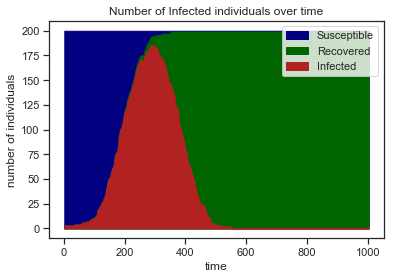

In [6]:
_ = plt.fill_between(np.linspace(1, 1003, 1003), [200] * 1003, color='Navy', label='Susceptible')
_ = plt.fill_between(np.linspace(1, 1003, 1003), np.array(num_infected)+np.array(num_recovered), 
                     color='Darkgreen', label='Recovered')
_ = plt.fill_between(np.linspace(1, 1003, 1003), num_infected, color='Firebrick', label='Infected')
_ = plt.xlabel('time')
_ = plt.ylabel('number of individuals')
_ = plt.title('Number of Infected individuals over time')
_ = plt.legend()
plt.show()

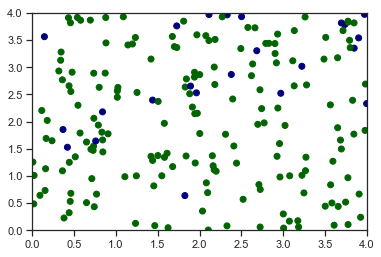

In [15]:
# Fixing random state for reproducibility
np.random.seed(100)

# Number of steps
N_steps = 200
# Number of agents
n_agents = 200
# Set delta t
dt = .1
# Set velocity
velo = .2
# Set percent of sheltering in place
per_shelt = .5
# Set boundaries
xboundaries = [0, 4]
yboundaries = [0, 4]
xmax, ymax = xboundaries[1], yboundaries[1]

# Define the figure
fig = plt.figure()
ax = plt.axes(xlim=(0, xmax), ylim=(0, ymax))

# lists to store x and y axis points 
agents = np.zeros(n_agents, dtype=[('position', float, 2),
                                  ('velocity', float, 2),
                                  ('color', str, 20),
                                  ('state', str, 20),
                                  ('time', int, 1)])

# Define the initial positions
agents['position'] = np.random.uniform(0, 4, (n_agents, 2))

# Define the initial angles
init_angles = np.random.uniform(0, 2 * np.pi, n_agents)
# Get initial x and y velocities from angles
velocities = np.array([[np.sin(x), np.cos(x)] for x in init_angles]) * velo
num_shelt = int(per_shelt * n_agents)
velocities[:num_shelt] = np.zeros((num_shelt, 2))

agents['velocity'] = velocities
agents['color'] = np.array(['Navy'] * n_agents)
agents['state'] = np.array(['Susceptible'] * n_agents)
agents['time'] = np.array([0] * n_agents)

# Make the one infected
agents['color'][0] = 'Firebrick'
agents['state'][0] = 'Infected'
agents['time'][0] = 1
# Initialize the plot
scatter = ax.scatter(agents['position'][:, 0], agents['position'][:, 1], color=agents['color'])
num_infected = [sum(agents['state']=='Infected')]
num_recovered = [0]
def update(i):
    # Define the new time
    t = i * dt + dt
    for j in range(n_agents):
        if agents['time'][j] != 0:
            if agents['state'][j] == 'Infected' and agents['time'][j] >= 200:
                agents['state'][j] = 'Recovered'
                agents['color'][j] = 'Darkgreen'
                agents['time'][j] = 0
            elif agents['state'][j] == 'Infected':
                agents['time'][j] += 1
        # New displacements (prior velocity times change in time)
        deltax_temp = dt * agents['velocity'][j, 0]
        deltay_temp = dt * agents['velocity'][j, 1]
        # New positions
        x = agents['position'][j, 0] + deltax_temp
        y = agents['position'][j, 1] + deltay_temp
        # Compute new velocity
        vx_temp = deltax_temp / dt
        vy_temp = deltay_temp / dt
        
        # Add collision
        for k in range(n_agents):
            # Go through all other agents that could be interacted with
            if k != j:
                # Compute components of distance
                dx = agents['position'][j, 0] - agents['position'][k, 0]
                dy = agents['position'][j, 1] - agents['position'][k, 1]
                # Compute distance between agents
                dist_temp = np.sqrt(dx ** 2 + dy ** 2)
                # If distance of interaction is closer than both radii, collide
                if dist_temp <= .05:
                    if agents['state'][j] == 'Infected' and agents['state'][k] == 'Susceptible':
                        agents['state'][k] = 'Infected'
                        agents['time'][k] += 1
                        agents['color'][k] = 'Firebrick'
        if x >= xmax:
            x = 2 * xmax - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif x <= 0:
            x = - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif y >= ymax:
            y = 2 * ymax - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        elif y <= 0:
            y = - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        # Pick a new position for oldest rain drop, resetting its size,
        # color and growth factor.
        
        agents['position'][j] = np.array([x, y])
        agents['velocity'][j, 0] = vx_temp
        agents['velocity'][j, 1] = vy_temp

        # Update the scatter collection, with the new colors, sizes and positions.
        scatter.set_color(agents['color'])
        scatter.set_offsets(agents['position'])
    temp = sum(agents['state']=='Infected')
    num_infected.append(temp)
    temp = sum(agents['state']=='Recovered')
    num_recovered.append(temp)
animation = FuncAnimation(fig, update, frames=1000, interval=20)

animation.save('baseline_half_shelter.gif', writer='imagemagick')
plt.show()

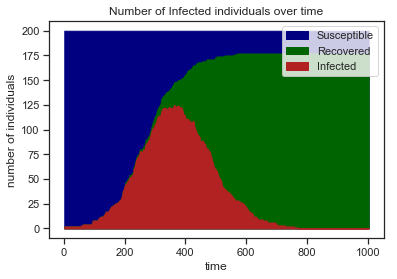

In [16]:
_ = plt.fill_between(np.linspace(1, 1003, 1003), [200] * 1003, color='Navy', label='Susceptible')
_ = plt.fill_between(np.linspace(1, 1003, 1003), np.array(num_infected)+np.array(num_recovered), 
                     color='Darkgreen', label='Recovered')
_ = plt.fill_between(np.linspace(1, 1003, 1003), num_infected, color='Firebrick', label='Infected')
_ = plt.xlabel('time')
_ = plt.ylabel('number of individuals')
_ = plt.title('Number of Infected individuals over time')
_ = plt.legend()
plt.show()

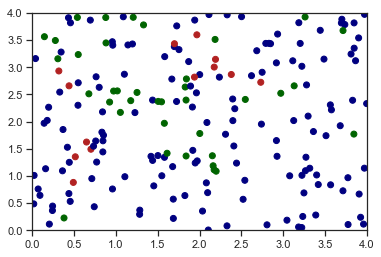

In [17]:
# Fixing random state for reproducibility
np.random.seed(100)

# Number of steps
N_steps = 200
# Number of agents
n_agents = 200
# Set delta t
dt = .1
# Set velocity
velo = .2
# Set percent of sheltering in place
per_shelt = .9
# Set boundaries
xboundaries = [0, 4]
yboundaries = [0, 4]
xmax, ymax = xboundaries[1], yboundaries[1]

# Define the figure
fig = plt.figure()
ax = plt.axes(xlim=(0, xmax), ylim=(0, ymax))

# lists to store x and y axis points 
agents = np.zeros(n_agents, dtype=[('position', float, 2),
                                  ('velocity', float, 2),
                                  ('color', str, 20),
                                  ('state', str, 20),
                                  ('time', int, 1)])

# Define the initial positions
agents['position'] = np.random.uniform(0, 4, (n_agents, 2))

# Define the initial velocity angles
init_angles = np.random.uniform(0, 2 * np.pi, n_agents)
# Get initial x and y velocities from angles
velocities = np.array([[np.sin(x), np.cos(x)] for x in init_angles]) * velo
# Get percentage of agents 'sheltering'
num_shelt = int(per_shelt * n_agents)
# Make sheltering agents static
velocities[:num_shelt] = np.zeros((num_shelt, 2))

# Assign values to agents
agents['velocity'] = velocities
agents['color'] = np.array(['Navy'] * n_agents)
agents['state'] = np.array(['Susceptible'] * n_agents)
agents['time'] = np.array([0] * n_agents)

# Make the one agent infected
agents['color'][0] = 'Firebrick'
agents['state'][0] = 'Infected'
agents['time'][0] = 1

# Initialize the plot
scatter = ax.scatter(agents['position'][:, 0], agents['position'][:, 1], color=agents['color'])
# Initialize lists storing number of infected and recovered
num_infected = [sum(agents['state']=='Infected')]
num_recovered = [0]

def update(i):
    
    # Define the new time
    t = i * dt + dt
    # Iterate over all possible interactions
    for j in range(n_agents):
        if agents['time'][j] != 0:
            if agents['state'][j] == 'Infected' and agents['time'][j] >= 200:
                agents['state'][j] = 'Recovered'
                agents['color'][j] = 'Darkgreen'
                agents['time'][j] = 0
            elif agents['state'][j] == 'Infected':
                agents['time'][j] += 1
        # New displacements (prior velocity times change in time)
        deltax_temp = dt * agents['velocity'][j, 0]
        deltay_temp = dt * agents['velocity'][j, 1]
        # New positions
        x = agents['position'][j, 0] + deltax_temp
        y = agents['position'][j, 1] + deltay_temp
        # Compute new velocity
        vx_temp = deltax_temp / dt
        vy_temp = deltay_temp / dt
        
        # Add collision
        for k in range(n_agents):
            # Go through all other agents that could be interacted with
            if k != j:
                # Compute components of distance
                dx = agents['position'][j, 0] - agents['position'][k, 0]
                dy = agents['position'][j, 1] - agents['position'][k, 1]
                # Compute distance between agents
                dist_temp = np.sqrt(dx ** 2 + dy ** 2)
                # If distance of interaction is closer than both radii, collide
                if dist_temp <= .05:
                    if agents['state'][j] == 'Infected' and agents['state'][k] == 'Susceptible':
                        agents['state'][k] = 'Infected'
                        agents['time'][k] += 1
                        agents['color'][k] = 'Firebrick'
        if x >= xmax:
            x = 2 * xmax - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif x <= 0:
            x = - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif y >= ymax:
            y = 2 * ymax - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        elif y <= 0:
            y = - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        # Pick a new position for oldest rain drop, resetting its size,
        # color and growth factor.
        
        agents['position'][j] = np.array([x, y])
        agents['velocity'][j, 0] = vx_temp
        agents['velocity'][j, 1] = vy_temp

        # Update the scatter collection, with the new colors, sizes and positions.
        scatter.set_color(agents['color'])
        scatter.set_offsets(agents['position'])
    temp = sum(agents['state']=='Infected')
    num_infected.append(temp)
    temp = sum(agents['state']=='Recovered')
    num_recovered.append(temp)
animation = FuncAnimation(fig, update, frames=1000, interval=20)

animation.save('baseline_most_shelter.gif', writer='imagemagick')
plt.show()

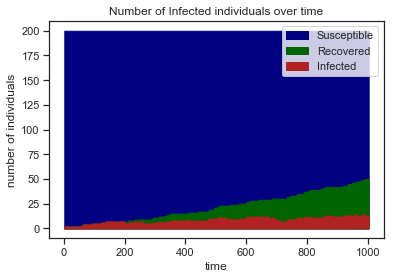

In [18]:
_ = plt.fill_between(np.linspace(1, 1003, 1003), [200] * 1003, color='Navy', label='Susceptible')
_ = plt.fill_between(np.linspace(1, 1003, 1003), np.array(num_infected)+np.array(num_recovered), 
                     color='Darkgreen', label='Recovered')
_ = plt.fill_between(np.linspace(1, 1003, 1003), num_infected, color='Firebrick', label='Infected')
_ = plt.xlabel('time')
_ = plt.ylabel('number of individuals')
_ = plt.title('Number of Infected individuals over time')
_ = plt.legend()
plt.show()

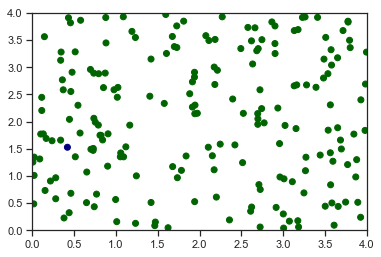

In [22]:
# Fixing random state for reproducibility
np.random.seed(100)

# Number of steps
N_steps = 200
# Number of agents
n_agents = 200
# Set delta t
dt = .1
# Set velocity
velo = .2
# Set percent of sheltering in place
per_shelt = .1
# Set boundaries
xboundaries = [0, 4]
yboundaries = [0, 4]
xmax, ymax = xboundaries[1], yboundaries[1]

# Define the figure
fig = plt.figure()
ax = plt.axes(xlim=(0, xmax), ylim=(0, ymax))

# lists to store x and y axis points 
agents = np.zeros(n_agents, dtype=[('position', float, 2),
                                  ('velocity', float, 2),
                                  ('color', str, 20),
                                  ('state', str, 20),
                                  ('time', int, 1)])

# Define the initial positions
agents['position'] = np.random.uniform(0, 4, (n_agents, 2))

# Define the initial velocity angles
init_angles = np.random.uniform(0, 2 * np.pi, n_agents)
# Get initial x and y velocities from angles
velocities = np.array([[np.sin(x), np.cos(x)] for x in init_angles]) * velo
# Get percentage of agents 'sheltering'
num_shelt = int(per_shelt * n_agents)
# Make sheltering agents static
velocities[:num_shelt] = np.zeros((num_shelt, 2))

# Assign values to agents
agents['velocity'] = velocities
agents['color'] = np.array(['Navy'] * n_agents)
agents['state'] = np.array(['Susceptible'] * n_agents)
agents['time'] = np.array([0] * n_agents)

# Make the one agent infected
agents['color'][0] = 'Firebrick'
agents['state'][0] = 'Infected'
agents['time'][0] = 1

# Initialize the plot
scatter = ax.scatter(agents['position'][:, 0], agents['position'][:, 1], color=agents['color'])
# Initialize lists storing number of infected and recovered
num_infected = [sum(agents['state']=='Infected')]
num_recovered = [0]

def update(i):
    
    # Define the new time
    t = i * dt + dt
    # Iterate over all possible interactions
    for j in range(n_agents):
        if agents['time'][j] != 0:
            if agents['state'][j] == 'Infected' and agents['time'][j] >= 200:
                agents['state'][j] = 'Recovered'
                agents['color'][j] = 'Darkgreen'
                agents['time'][j] = 0
            elif agents['state'][j] == 'Infected':
                agents['time'][j] += 1
        # New displacements (prior velocity times change in time)
        deltax_temp = dt * agents['velocity'][j, 0]
        deltay_temp = dt * agents['velocity'][j, 1]
        # New positions
        x = agents['position'][j, 0] + deltax_temp
        y = agents['position'][j, 1] + deltay_temp
        # Compute new velocity
        vx_temp = deltax_temp / dt
        vy_temp = deltay_temp / dt
        
        # Add collision
        for k in range(n_agents):
            # Go through all other agents that could be interacted with
            if k != j:
                # Compute components of distance
                dx = agents['position'][j, 0] - agents['position'][k, 0]
                dy = agents['position'][j, 1] - agents['position'][k, 1]
                # Compute distance between agents
                dist_temp = np.sqrt(dx ** 2 + dy ** 2)
                # If distance of interaction is closer than both radii, collide
                if dist_temp <= .05:
                    if agents['state'][j] == 'Infected' and agents['state'][k] == 'Susceptible':
                        agents['state'][k] = 'Infected'
                        agents['time'][k] += 1
                        agents['color'][k] = 'Firebrick'
        if x >= xmax:
            x = 2 * xmax - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif x <= 0:
            x = - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif y >= ymax:
            y = 2 * ymax - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        elif y <= 0:
            y = - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        # Pick a new position for oldest rain drop, resetting its size,
        # color and growth factor.
        
        agents['position'][j] = np.array([x, y])
        agents['velocity'][j, 0] = vx_temp
        agents['velocity'][j, 1] = vy_temp

        # Update the scatter collection, with the new colors, sizes and positions.
        scatter.set_color(agents['color'])
        scatter.set_offsets(agents['position'])
    temp = sum(agents['state']=='Infected')
    num_infected.append(temp)
    temp = sum(agents['state']=='Recovered')
    num_recovered.append(temp)
animation = FuncAnimation(fig, update, frames=1000, interval=20)

animation.save('baseline_10percent_shelter.gif', writer='imagemagick')
plt.show()

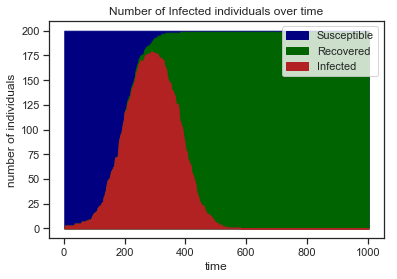

In [23]:
_ = plt.fill_between(np.linspace(1, 1003, 1003), [200] * 1003, color='Navy', label='Susceptible')
_ = plt.fill_between(np.linspace(1, 1003, 1003), np.array(num_infected)+np.array(num_recovered), 
                     color='Darkgreen', label='Recovered')
_ = plt.fill_between(np.linspace(1, 1003, 1003), num_infected, color='Firebrick', label='Infected')
_ = plt.xlabel('time')
_ = plt.ylabel('number of individuals')
_ = plt.title('Number of Infected individuals over time')
_ = plt.legend()
_ = plt.savefig('baseline_10percent_shelter.png', dpi=300)
plt.show()

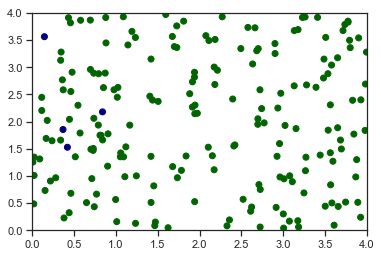

In [24]:
# Fixing random state for reproducibility
np.random.seed(100)

# Number of steps
N_steps = 200
# Number of agents
n_agents = 200
# Set delta t
dt = .1
# Set velocity
velo = .2
# Set percent of sheltering in place
per_shelt = .2
# Set boundaries
xboundaries = [0, 4]
yboundaries = [0, 4]
xmax, ymax = xboundaries[1], yboundaries[1]

# Define the figure
fig = plt.figure()
ax = plt.axes(xlim=(0, xmax), ylim=(0, ymax))

# lists to store x and y axis points 
agents = np.zeros(n_agents, dtype=[('position', float, 2),
                                  ('velocity', float, 2),
                                  ('color', str, 20),
                                  ('state', str, 20),
                                  ('time', int, 1)])

# Define the initial positions
agents['position'] = np.random.uniform(0, 4, (n_agents, 2))

# Define the initial velocity angles
init_angles = np.random.uniform(0, 2 * np.pi, n_agents)
# Get initial x and y velocities from angles
velocities = np.array([[np.sin(x), np.cos(x)] for x in init_angles]) * velo
# Get percentage of agents 'sheltering'
num_shelt = int(per_shelt * n_agents)
# Make sheltering agents static
velocities[:num_shelt] = np.zeros((num_shelt, 2))

# Assign values to agents
agents['velocity'] = velocities
agents['color'] = np.array(['Navy'] * n_agents)
agents['state'] = np.array(['Susceptible'] * n_agents)
agents['time'] = np.array([0] * n_agents)

# Make the one agent infected
agents['color'][0] = 'Firebrick'
agents['state'][0] = 'Infected'
agents['time'][0] = 1

# Initialize the plot
scatter = ax.scatter(agents['position'][:, 0], agents['position'][:, 1], color=agents['color'])
# Initialize lists storing number of infected and recovered
num_infected = [sum(agents['state']=='Infected')]
num_recovered = [0]

def update(i):
    
    # Define the new time
    t = i * dt + dt
    # Iterate over all possible interactions
    for j in range(n_agents):
        if agents['time'][j] != 0:
            if agents['state'][j] == 'Infected' and agents['time'][j] >= 200:
                agents['state'][j] = 'Recovered'
                agents['color'][j] = 'Darkgreen'
                agents['time'][j] = 0
            elif agents['state'][j] == 'Infected':
                agents['time'][j] += 1
        # New displacements (prior velocity times change in time)
        deltax_temp = dt * agents['velocity'][j, 0]
        deltay_temp = dt * agents['velocity'][j, 1]
        # New positions
        x = agents['position'][j, 0] + deltax_temp
        y = agents['position'][j, 1] + deltay_temp
        # Compute new velocity
        vx_temp = deltax_temp / dt
        vy_temp = deltay_temp / dt
        
        # Add collision
        for k in range(n_agents):
            # Go through all other agents that could be interacted with
            if k != j:
                # Compute components of distance
                dx = agents['position'][j, 0] - agents['position'][k, 0]
                dy = agents['position'][j, 1] - agents['position'][k, 1]
                # Compute distance between agents
                dist_temp = np.sqrt(dx ** 2 + dy ** 2)
                # If distance of interaction is closer than both radii, collide
                if dist_temp <= .05:
                    if agents['state'][j] == 'Infected' and agents['state'][k] == 'Susceptible':
                        agents['state'][k] = 'Infected'
                        agents['time'][k] += 1
                        agents['color'][k] = 'Firebrick'
        if x >= xmax:
            x = 2 * xmax - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif x <= 0:
            x = - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif y >= ymax:
            y = 2 * ymax - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        elif y <= 0:
            y = - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        # Pick a new position for oldest rain drop, resetting its size,
        # color and growth factor.
        
        agents['position'][j] = np.array([x, y])
        agents['velocity'][j, 0] = vx_temp
        agents['velocity'][j, 1] = vy_temp

        # Update the scatter collection, with the new colors, sizes and positions.
        scatter.set_color(agents['color'])
        scatter.set_offsets(agents['position'])
    temp = sum(agents['state']=='Infected')
    num_infected.append(temp)
    temp = sum(agents['state']=='Recovered')
    num_recovered.append(temp)
animation = FuncAnimation(fig, update, frames=1000, interval=20)

animation.save('baseline_20percent_shelter.gif', writer='imagemagick')
plt.show()

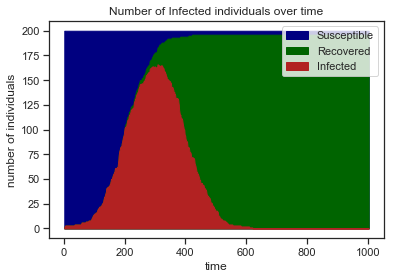

In [25]:
_ = plt.fill_between(np.linspace(1, 1003, 1003), [200] * 1003, color='Navy', label='Susceptible')
_ = plt.fill_between(np.linspace(1, 1003, 1003), np.array(num_infected)+np.array(num_recovered), 
                     color='Darkgreen', label='Recovered')
_ = plt.fill_between(np.linspace(1, 1003, 1003), num_infected, color='Firebrick', label='Infected')
_ = plt.xlabel('time')
_ = plt.ylabel('number of individuals')
_ = plt.title('Number of Infected individuals over time')
_ = plt.legend()
_ = plt.savefig('baseline_20percent_shelter.png', dpi=300)
plt.show()

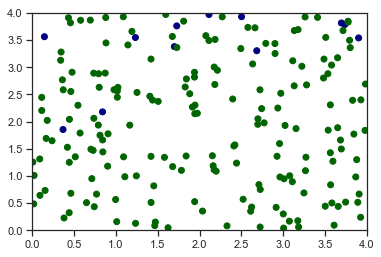

In [26]:
# Fixing random state for reproducibility
np.random.seed(100)

# Number of steps
N_steps = 200
# Number of agents
n_agents = 200
# Set delta t
dt = .1
# Set velocity
velo = .2
# Set percent of sheltering in place
per_shelt = .3
# Set boundaries
xboundaries = [0, 4]
yboundaries = [0, 4]
xmax, ymax = xboundaries[1], yboundaries[1]

# Define the figure
fig = plt.figure()
ax = plt.axes(xlim=(0, xmax), ylim=(0, ymax))

# lists to store x and y axis points 
agents = np.zeros(n_agents, dtype=[('position', float, 2),
                                  ('velocity', float, 2),
                                  ('color', str, 20),
                                  ('state', str, 20),
                                  ('time', int, 1)])

# Define the initial positions
agents['position'] = np.random.uniform(0, 4, (n_agents, 2))

# Define the initial velocity angles
init_angles = np.random.uniform(0, 2 * np.pi, n_agents)
# Get initial x and y velocities from angles
velocities = np.array([[np.sin(x), np.cos(x)] for x in init_angles]) * velo
# Get percentage of agents 'sheltering'
num_shelt = int(per_shelt * n_agents)
# Make sheltering agents static
velocities[:num_shelt] = np.zeros((num_shelt, 2))

# Assign values to agents
agents['velocity'] = velocities
agents['color'] = np.array(['Navy'] * n_agents)
agents['state'] = np.array(['Susceptible'] * n_agents)
agents['time'] = np.array([0] * n_agents)

# Make the one agent infected
agents['color'][0] = 'Firebrick'
agents['state'][0] = 'Infected'
agents['time'][0] = 1

# Initialize the plot
scatter = ax.scatter(agents['position'][:, 0], agents['position'][:, 1], color=agents['color'])
# Initialize lists storing number of infected and recovered
num_infected = [sum(agents['state']=='Infected')]
num_recovered = [0]

def update(i):
    
    # Define the new time
    t = i * dt + dt
    # Iterate over all possible interactions
    for j in range(n_agents):
        if agents['time'][j] != 0:
            if agents['state'][j] == 'Infected' and agents['time'][j] >= 200:
                agents['state'][j] = 'Recovered'
                agents['color'][j] = 'Darkgreen'
                agents['time'][j] = 0
            elif agents['state'][j] == 'Infected':
                agents['time'][j] += 1
        # New displacements (prior velocity times change in time)
        deltax_temp = dt * agents['velocity'][j, 0]
        deltay_temp = dt * agents['velocity'][j, 1]
        # New positions
        x = agents['position'][j, 0] + deltax_temp
        y = agents['position'][j, 1] + deltay_temp
        # Compute new velocity
        vx_temp = deltax_temp / dt
        vy_temp = deltay_temp / dt
        
        # Add collision
        for k in range(n_agents):
            # Go through all other agents that could be interacted with
            if k != j:
                # Compute components of distance
                dx = agents['position'][j, 0] - agents['position'][k, 0]
                dy = agents['position'][j, 1] - agents['position'][k, 1]
                # Compute distance between agents
                dist_temp = np.sqrt(dx ** 2 + dy ** 2)
                # If distance of interaction is closer than both radii, collide
                if dist_temp <= .05:
                    if agents['state'][j] == 'Infected' and agents['state'][k] == 'Susceptible':
                        agents['state'][k] = 'Infected'
                        agents['time'][k] += 1
                        agents['color'][k] = 'Firebrick'
        if x >= xmax:
            x = 2 * xmax - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif x <= 0:
            x = - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif y >= ymax:
            y = 2 * ymax - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        elif y <= 0:
            y = - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        # Pick a new position for oldest rain drop, resetting its size,
        # color and growth factor.
        
        agents['position'][j] = np.array([x, y])
        agents['velocity'][j, 0] = vx_temp
        agents['velocity'][j, 1] = vy_temp

        # Update the scatter collection, with the new colors, sizes and positions.
        scatter.set_color(agents['color'])
        scatter.set_offsets(agents['position'])
    temp = sum(agents['state']=='Infected')
    num_infected.append(temp)
    temp = sum(agents['state']=='Recovered')
    num_recovered.append(temp)
animation = FuncAnimation(fig, update, frames=1000, interval=20)

animation.save('baseline_30percent_shelter.gif', writer='imagemagick')
plt.show()

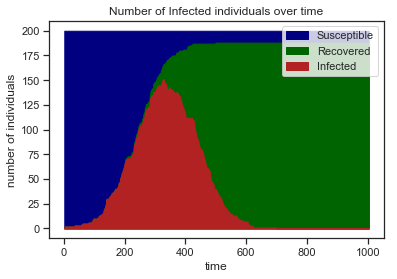

In [27]:
_ = plt.fill_between(np.linspace(1, 1003, 1003), [200] * 1003, color='Navy', label='Susceptible')
_ = plt.fill_between(np.linspace(1, 1003, 1003), np.array(num_infected)+np.array(num_recovered), 
                     color='Darkgreen', label='Recovered')
_ = plt.fill_between(np.linspace(1, 1003, 1003), num_infected, color='Firebrick', label='Infected')
_ = plt.xlabel('time')
_ = plt.ylabel('number of individuals')
_ = plt.title('Number of Infected individuals over time')
_ = plt.legend()
_ = plt.savefig('baseline_30percent_shelter.png', dpi=300)
plt.show()

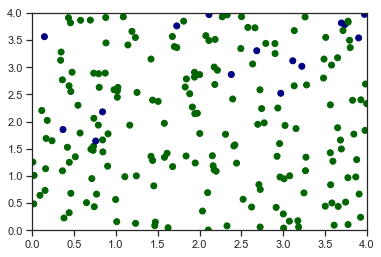

In [28]:
# Fixing random state for reproducibility
np.random.seed(100)

# Number of steps
N_steps = 200
# Number of agents
n_agents = 200
# Set delta t
dt = .1
# Set velocity
velo = .2
# Set percent of sheltering in place
per_shelt = .4
# Set boundaries
xboundaries = [0, 4]
yboundaries = [0, 4]
xmax, ymax = xboundaries[1], yboundaries[1]

# Define the figure
fig = plt.figure()
ax = plt.axes(xlim=(0, xmax), ylim=(0, ymax))

# lists to store x and y axis points 
agents = np.zeros(n_agents, dtype=[('position', float, 2),
                                  ('velocity', float, 2),
                                  ('color', str, 20),
                                  ('state', str, 20),
                                  ('time', int, 1)])

# Define the initial positions
agents['position'] = np.random.uniform(0, 4, (n_agents, 2))

# Define the initial velocity angles
init_angles = np.random.uniform(0, 2 * np.pi, n_agents)
# Get initial x and y velocities from angles
velocities = np.array([[np.sin(x), np.cos(x)] for x in init_angles]) * velo
# Get percentage of agents 'sheltering'
num_shelt = int(per_shelt * n_agents)
# Make sheltering agents static
velocities[:num_shelt] = np.zeros((num_shelt, 2))

# Assign values to agents
agents['velocity'] = velocities
agents['color'] = np.array(['Navy'] * n_agents)
agents['state'] = np.array(['Susceptible'] * n_agents)
agents['time'] = np.array([0] * n_agents)

# Make the one agent infected
agents['color'][0] = 'Firebrick'
agents['state'][0] = 'Infected'
agents['time'][0] = 1

# Initialize the plot
scatter = ax.scatter(agents['position'][:, 0], agents['position'][:, 1], color=agents['color'])
# Initialize lists storing number of infected and recovered
num_infected = [sum(agents['state']=='Infected')]
num_recovered = [0]

def update(i):
    
    # Define the new time
    t = i * dt + dt
    # Iterate over all possible interactions
    for j in range(n_agents):
        if agents['time'][j] != 0:
            if agents['state'][j] == 'Infected' and agents['time'][j] >= 200:
                agents['state'][j] = 'Recovered'
                agents['color'][j] = 'Darkgreen'
                agents['time'][j] = 0
            elif agents['state'][j] == 'Infected':
                agents['time'][j] += 1
        # New displacements (prior velocity times change in time)
        deltax_temp = dt * agents['velocity'][j, 0]
        deltay_temp = dt * agents['velocity'][j, 1]
        # New positions
        x = agents['position'][j, 0] + deltax_temp
        y = agents['position'][j, 1] + deltay_temp
        # Compute new velocity
        vx_temp = deltax_temp / dt
        vy_temp = deltay_temp / dt
        
        # Add collision
        for k in range(n_agents):
            # Go through all other agents that could be interacted with
            if k != j:
                # Compute components of distance
                dx = agents['position'][j, 0] - agents['position'][k, 0]
                dy = agents['position'][j, 1] - agents['position'][k, 1]
                # Compute distance between agents
                dist_temp = np.sqrt(dx ** 2 + dy ** 2)
                # If distance of interaction is closer than both radii, collide
                if dist_temp <= .05:
                    if agents['state'][j] == 'Infected' and agents['state'][k] == 'Susceptible':
                        agents['state'][k] = 'Infected'
                        agents['time'][k] += 1
                        agents['color'][k] = 'Firebrick'
        if x >= xmax:
            x = 2 * xmax - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif x <= 0:
            x = - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif y >= ymax:
            y = 2 * ymax - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        elif y <= 0:
            y = - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        # Pick a new position for oldest rain drop, resetting its size,
        # color and growth factor.
        
        agents['position'][j] = np.array([x, y])
        agents['velocity'][j, 0] = vx_temp
        agents['velocity'][j, 1] = vy_temp

        # Update the scatter collection, with the new colors, sizes and positions.
        scatter.set_color(agents['color'])
        scatter.set_offsets(agents['position'])
    temp = sum(agents['state']=='Infected')
    num_infected.append(temp)
    temp = sum(agents['state']=='Recovered')
    num_recovered.append(temp)
animation = FuncAnimation(fig, update, frames=1000, interval=20)

animation.save('baseline_40percent_shelter.gif', writer='imagemagick')
plt.show()

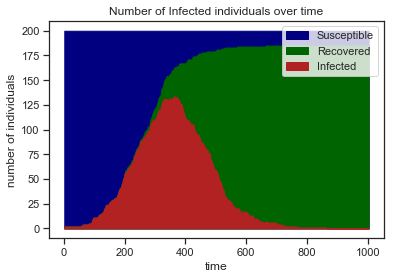

In [29]:
_ = plt.fill_between(np.linspace(1, 1003, 1003), [200] * 1003, color='Navy', label='Susceptible')
_ = plt.fill_between(np.linspace(1, 1003, 1003), np.array(num_infected)+np.array(num_recovered), 
                     color='Darkgreen', label='Recovered')
_ = plt.fill_between(np.linspace(1, 1003, 1003), num_infected, color='Firebrick', label='Infected')
_ = plt.xlabel('time')
_ = plt.ylabel('number of individuals')
_ = plt.title('Number of Infected individuals over time')
_ = plt.legend()
_ = plt.savefig('baseline_40percent_shelter.png', dpi=300)
plt.show()

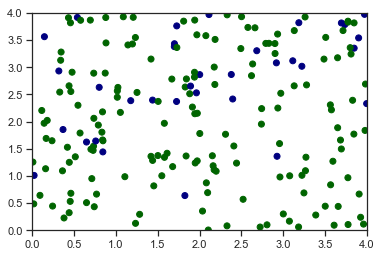

In [30]:
# Fixing random state for reproducibility
np.random.seed(100)

# Number of steps
N_steps = 200
# Number of agents
n_agents = 200
# Set delta t
dt = .1
# Set velocity
velo = .2
# Set percent of sheltering in place
per_shelt = .6
# Set boundaries
xboundaries = [0, 4]
yboundaries = [0, 4]
xmax, ymax = xboundaries[1], yboundaries[1]

# Define the figure
fig = plt.figure()
ax = plt.axes(xlim=(0, xmax), ylim=(0, ymax))

# lists to store x and y axis points 
agents = np.zeros(n_agents, dtype=[('position', float, 2),
                                  ('velocity', float, 2),
                                  ('color', str, 20),
                                  ('state', str, 20),
                                  ('time', int, 1)])

# Define the initial positions
agents['position'] = np.random.uniform(0, 4, (n_agents, 2))

# Define the initial velocity angles
init_angles = np.random.uniform(0, 2 * np.pi, n_agents)
# Get initial x and y velocities from angles
velocities = np.array([[np.sin(x), np.cos(x)] for x in init_angles]) * velo
# Get percentage of agents 'sheltering'
num_shelt = int(per_shelt * n_agents)
# Make sheltering agents static
velocities[:num_shelt] = np.zeros((num_shelt, 2))

# Assign values to agents
agents['velocity'] = velocities
agents['color'] = np.array(['Navy'] * n_agents)
agents['state'] = np.array(['Susceptible'] * n_agents)
agents['time'] = np.array([0] * n_agents)

# Make the one agent infected
agents['color'][0] = 'Firebrick'
agents['state'][0] = 'Infected'
agents['time'][0] = 1

# Initialize the plot
scatter = ax.scatter(agents['position'][:, 0], agents['position'][:, 1], color=agents['color'])
# Initialize lists storing number of infected and recovered
num_infected = [sum(agents['state']=='Infected')]
num_recovered = [0]

def update(i):
    
    # Define the new time
    t = i * dt + dt
    # Iterate over all possible interactions
    for j in range(n_agents):
        if agents['time'][j] != 0:
            if agents['state'][j] == 'Infected' and agents['time'][j] >= 200:
                agents['state'][j] = 'Recovered'
                agents['color'][j] = 'Darkgreen'
                agents['time'][j] = 0
            elif agents['state'][j] == 'Infected':
                agents['time'][j] += 1
        # New displacements (prior velocity times change in time)
        deltax_temp = dt * agents['velocity'][j, 0]
        deltay_temp = dt * agents['velocity'][j, 1]
        # New positions
        x = agents['position'][j, 0] + deltax_temp
        y = agents['position'][j, 1] + deltay_temp
        # Compute new velocity
        vx_temp = deltax_temp / dt
        vy_temp = deltay_temp / dt
        
        # Add collision
        for k in range(n_agents):
            # Go through all other agents that could be interacted with
            if k != j:
                # Compute components of distance
                dx = agents['position'][j, 0] - agents['position'][k, 0]
                dy = agents['position'][j, 1] - agents['position'][k, 1]
                # Compute distance between agents
                dist_temp = np.sqrt(dx ** 2 + dy ** 2)
                # If distance of interaction is closer than both radii, collide
                if dist_temp <= .05:
                    if agents['state'][j] == 'Infected' and agents['state'][k] == 'Susceptible':
                        agents['state'][k] = 'Infected'
                        agents['time'][k] += 1
                        agents['color'][k] = 'Firebrick'
        if x >= xmax:
            x = 2 * xmax - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif x <= 0:
            x = - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif y >= ymax:
            y = 2 * ymax - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        elif y <= 0:
            y = - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        # Pick a new position for oldest rain drop, resetting its size,
        # color and growth factor.
        
        agents['position'][j] = np.array([x, y])
        agents['velocity'][j, 0] = vx_temp
        agents['velocity'][j, 1] = vy_temp

        # Update the scatter collection, with the new colors, sizes and positions.
        scatter.set_color(agents['color'])
        scatter.set_offsets(agents['position'])
    temp = sum(agents['state']=='Infected')
    num_infected.append(temp)
    temp = sum(agents['state']=='Recovered')
    num_recovered.append(temp)
animation = FuncAnimation(fig, update, frames=1000, interval=20)

animation.save('baseline_60percent_shelter.gif', writer='imagemagick')
plt.show()

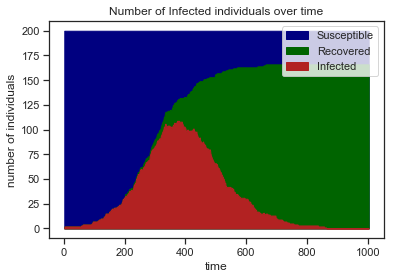

In [31]:
_ = plt.fill_between(np.linspace(1, 1003, 1003), [200] * 1003, color='Navy', label='Susceptible')
_ = plt.fill_between(np.linspace(1, 1003, 1003), np.array(num_infected)+np.array(num_recovered), 
                     color='Darkgreen', label='Recovered')
_ = plt.fill_between(np.linspace(1, 1003, 1003), num_infected, color='Firebrick', label='Infected')
_ = plt.xlabel('time')
_ = plt.ylabel('number of individuals')
_ = plt.title('Number of Infected individuals over time')
_ = plt.legend()
_ = plt.savefig('baseline_60percent_shelter.png', dpi=300)
plt.show()

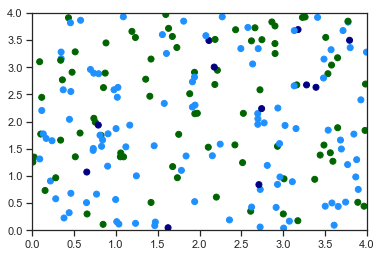

In [42]:
# Fixing random state for reproducibility
np.random.seed(100)

# Number of steps
N_steps = 200
# Number of agents
n_agents = 200
# Set delta t
dt = .1
# Set velocity
velo = .2
# Set percent of sheltering in place
per_shelt = 0
# Set boundaries
xboundaries = [0, 4]
yboundaries = [0, 4]
xmax, ymax = xboundaries[1], yboundaries[1]

# Define the figure
fig = plt.figure()
ax = plt.axes(xlim=(0, xmax), ylim=(0, ymax))

# lists to store x and y axis points 
agents = np.zeros(n_agents, dtype=[('position', float, 2),
                                  ('velocity', float, 2),
                                  ('color', str, 20),
                                  ('state', str, 20),
                                  ('time', int, 1),
                                  ('mask', bool, 1)])

# Define the initial positions
agents['position'] = np.random.uniform(0, 4, (n_agents, 2))

# Define the initial velocity angles
init_angles = np.random.uniform(0, 2 * np.pi, n_agents)
# Get initial x and y velocities from angles
velocities = np.array([[np.sin(x), np.cos(x)] for x in init_angles]) * velo
# Get percentage of agents 'sheltering'
num_shelt = int(per_shelt * n_agents)
# Make sheltering agents static
velocities[:num_shelt] = np.zeros((num_shelt, 2))

# Assign values to agents
agents['velocity'] = velocities
agents['color'] = np.array(['Navy'] * n_agents)
agents['state'] = np.array(['Susceptible'] * n_agents)
agents['time'] = np.array([0] * n_agents)
agents['mask'] = np.random.choice([True, False], 200, replace=True)
agents['color'][agents['mask'] == True] = 'Dodgerblue'

# Make the one agent infected
agents['color'][0] = 'Firebrick'
agents['state'][0] = 'Infected'
agents['time'][0] = 1

# Initialize the plot
scatter = ax.scatter(agents['position'][:, 0], agents['position'][:, 1], color=agents['color'])
# Initialize lists storing number of infected and recovered
num_infected = [sum(agents['state']=='Infected')]
num_recovered = [0]

def update(i):
    
    # Define the new time
    t = i * dt + dt
    # Iterate over all possible interactions
    for j in range(n_agents):
        if agents['time'][j] != 0:
            if agents['state'][j] == 'Infected' and agents['time'][j] >= 200:
                agents['state'][j] = 'Recovered'
                agents['color'][j] = 'Darkgreen'
                agents['time'][j] = 0
            elif agents['state'][j] == 'Infected':
                agents['time'][j] += 1
        # New displacements (prior velocity times change in time)
        deltax_temp = dt * agents['velocity'][j, 0]
        deltay_temp = dt * agents['velocity'][j, 1]
        # New positions
        x = agents['position'][j, 0] + deltax_temp
        y = agents['position'][j, 1] + deltay_temp
        # Compute new velocity
        vx_temp = deltax_temp / dt
        vy_temp = deltay_temp / dt
        
        # Add interaction
        for k in range(n_agents):
            # Go through all other agents that could be interacted with
            if k != j:
                # Compute components of distance
                dx = agents['position'][j, 0] - agents['position'][k, 0]
                dy = agents['position'][j, 1] - agents['position'][k, 1]
                # Compute distance between agents
                dist_temp = np.sqrt(dx ** 2 + dy ** 2)
                # If distance of interaction is closer than both radii, collide
                if dist_temp <= .05:
                    if agents['state'][j] == 'Infected' and agents['state'][k] == 'Susceptible':
                        if agents['mask'][j] == True and agents['mask'][k] == True:
                            if np.random.random() >= .85:
                                agents['state'][k] = 'Infected'
                                agents['color'][k] = 'Orangered'
                                agents['time'][k] = 1
                        elif agents['mask'][j] == True and agents['mask'][k] == False:
                            if np.random.random() >= .95:
                                agents['state'][k] = 'Infected'
                                agents['color'][k] = 'Firebrick'
                                agents['time'][k] = 1
                        elif agents['mask'][j] == False and agents['mask'][k] == False:
                            agents['state'][k] = 'Infected'
                            agents['color'][k] = 'Firebrick'
                            agents['time'][k] = 1
        if x >= xmax:
            x = 2 * xmax - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif x <= 0:
            x = - deltax_temp - agents['position'][j, 0]
            vx_temp *= -1
        elif y >= ymax:
            y = 2 * ymax - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        elif y <= 0:
            y = - deltay_temp - agents['position'][j, 1]
            vy_temp *= -1
        # Pick a new position for oldest rain drop, resetting its size,
        # color and growth factor.
        
        agents['position'][j] = np.array([x, y])
        agents['velocity'][j, 0] = vx_temp
        agents['velocity'][j, 1] = vy_temp

        # Update the scatter collection, with the new colors, sizes and positions.
        scatter.set_color(agents['color'])
        scatter.set_offsets(agents['position'])
    temp = sum(agents['state']=='Infected')
    num_infected.append(temp)
    temp = sum(agents['state']=='Recovered')
    num_recovered.append(temp)
animation = FuncAnimation(fig, update, frames=1000, interval=20)

animation.save('baseline_50percent_masked.gif', writer='imagemagick')
plt.show()

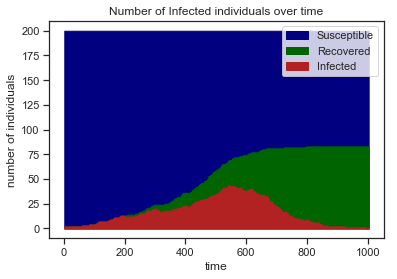

In [39]:
_ = plt.fill_between(np.linspace(1, 1003, 1003), [200] * 1003, color='Navy', label='Susceptible')
_ = plt.fill_between(np.linspace(1, 1003, 1003), np.array(num_infected)+np.array(num_recovered), 
                     color='Darkgreen', label='Recovered')
_ = plt.fill_between(np.linspace(1, 1003, 1003), num_infected, color='Firebrick', label='Infected')
_ = plt.xlabel('time')
_ = plt.ylabel('number of individuals')
_ = plt.title('Number of Infected individuals over time')
_ = plt.legend()
_ = plt.savefig('baseline_50percent_masked.png', dpi=300)
plt.show()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2 1


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2 2


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2 3


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2 4


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2 5


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2 6


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2 7


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2 8


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2 9


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3 0


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3 1


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3 2


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3 3


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3 4


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3 5


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3 6


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3 7


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3 8


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3 9


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4 0


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4 1


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4 2


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4 3


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4 4


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4 5


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4 6


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4 7


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4 8


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4 9


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


5 0


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


5 1


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


5 2


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


5 3


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


5 4


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


5 5


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


5 6


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


5 7


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


5 8


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


5 9


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 0


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 1


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 2


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 3


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 4


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 5


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 6


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 7


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 8


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6 9


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


7 0


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


7 1


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


7 2


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


7 3


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


7 4


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


7 5


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


7 6


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


7 7


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


7 8


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


7 9


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8 0


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8 1


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8 2


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8 3


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8 4


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8 5


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8 6


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8 7


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8 8


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


8 9


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


9 0


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


9 1


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


9 2


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


9 3


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


9 4


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


9 5


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


9 6


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


9 7


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


9 8


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


9 9


/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
Traceback (most recent call last):
  File "/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1740, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/Users/adam/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1762, in _draw_frame
    self._drawn_artists = self._func(framedata, *self.

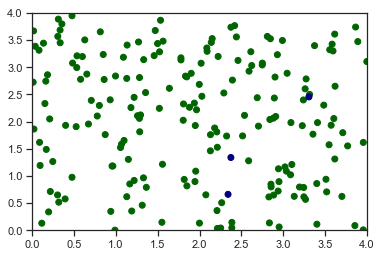

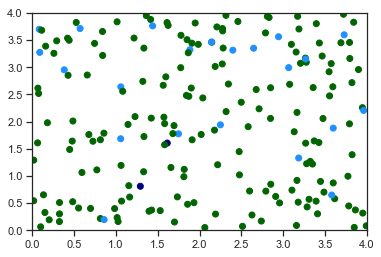

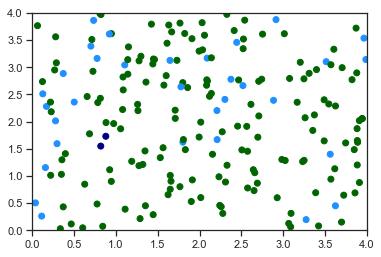

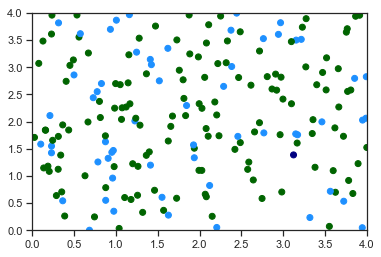

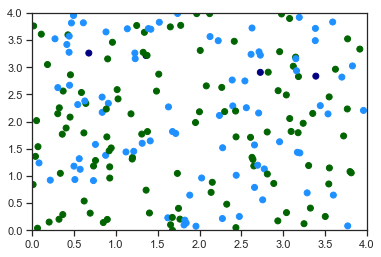

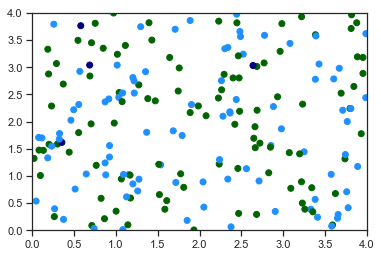

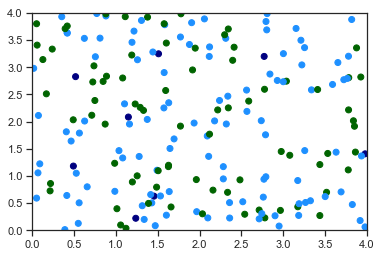

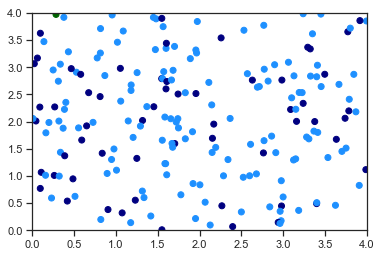

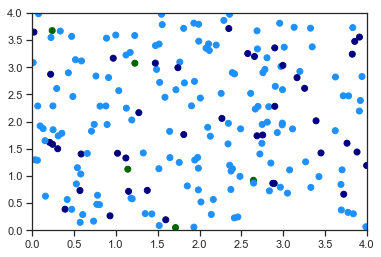

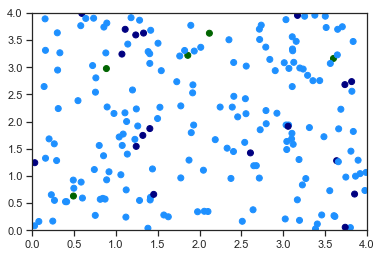

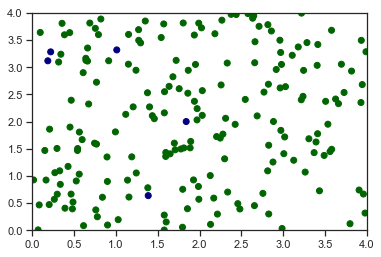

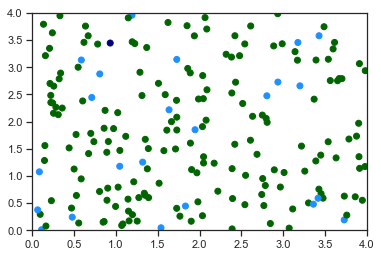

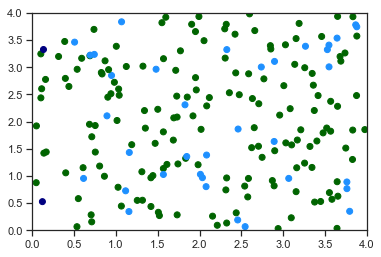

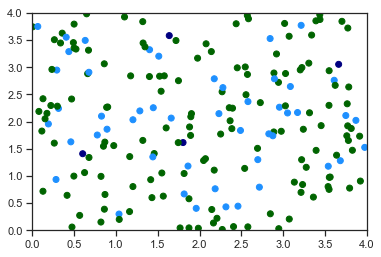

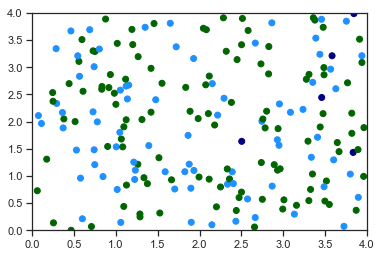

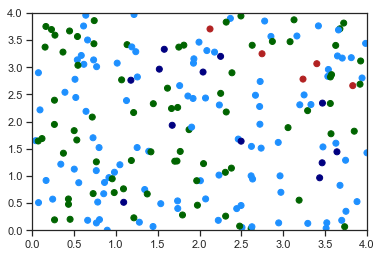

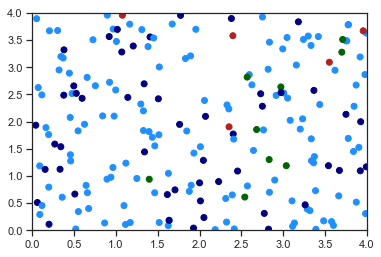

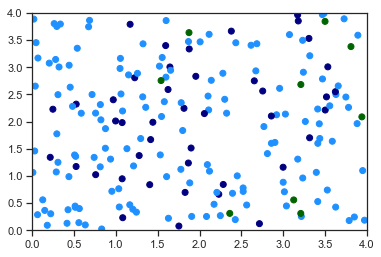

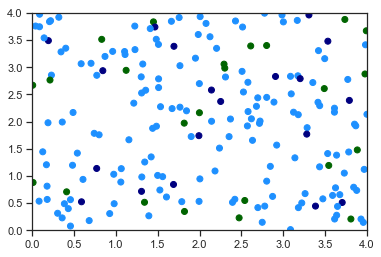

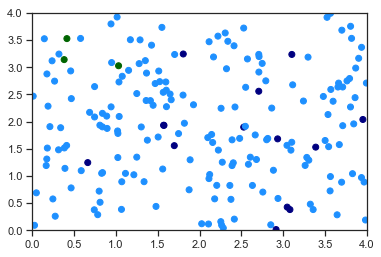

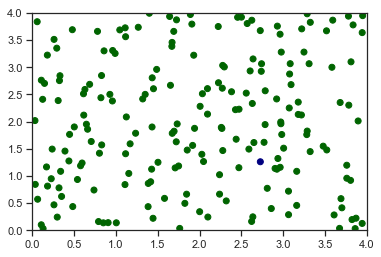

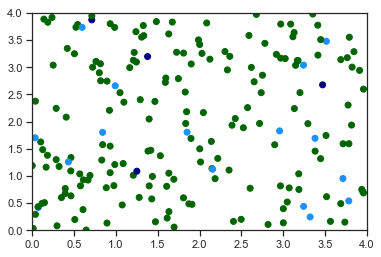

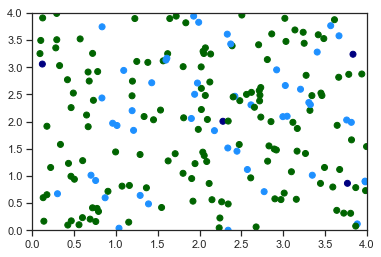

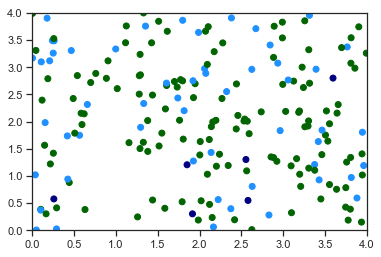

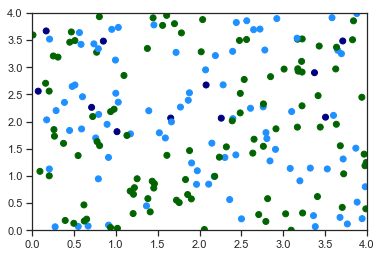

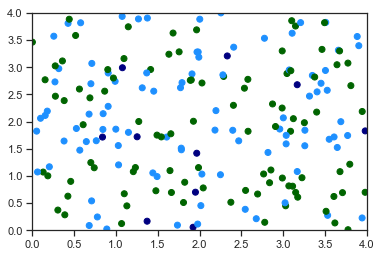

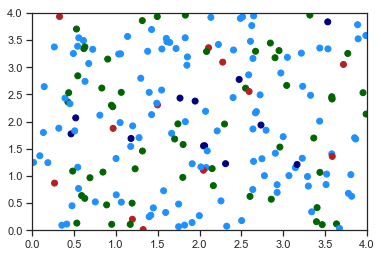

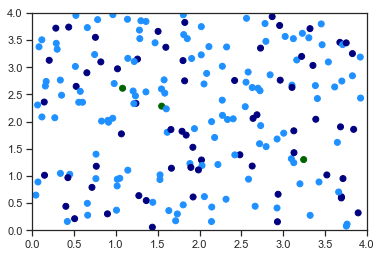

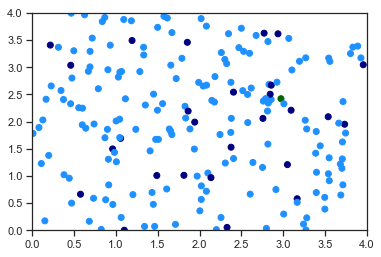

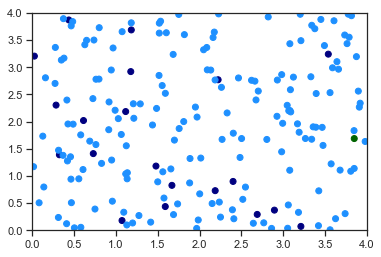

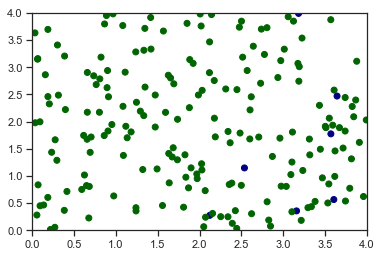

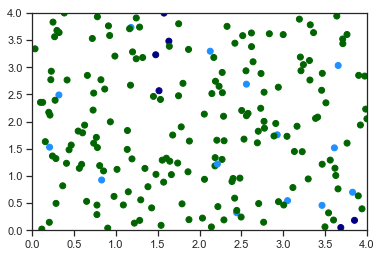

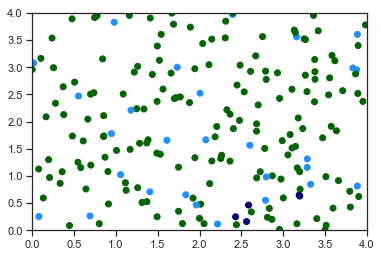

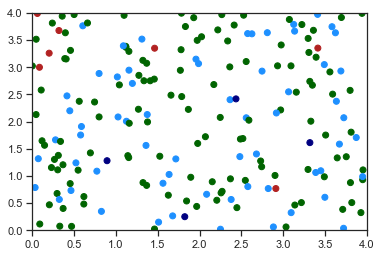

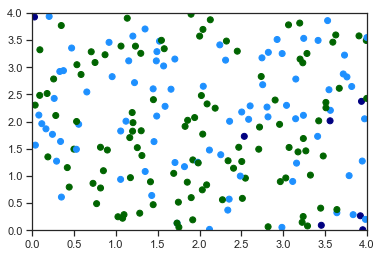

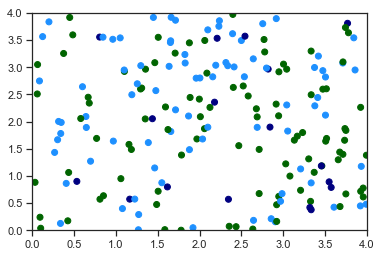

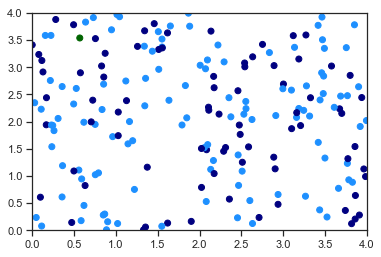

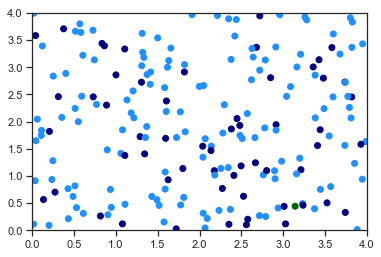

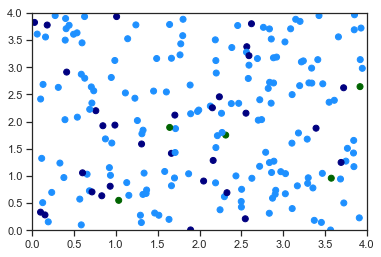

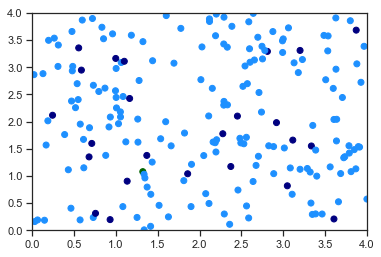

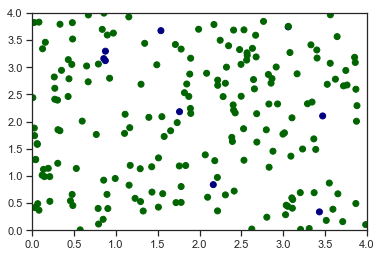

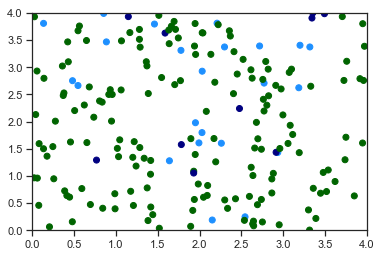

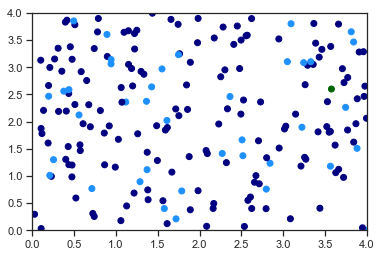

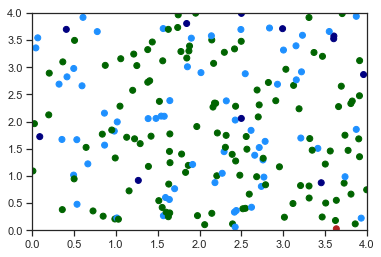

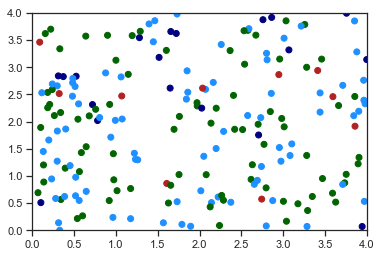

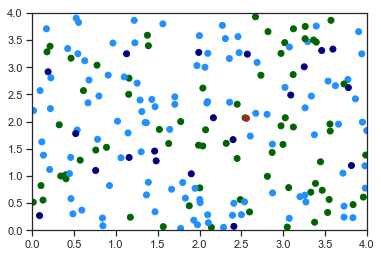

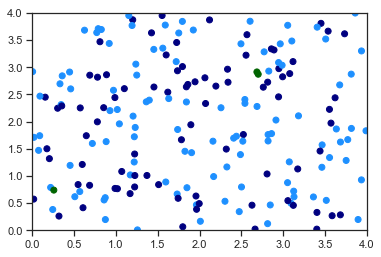

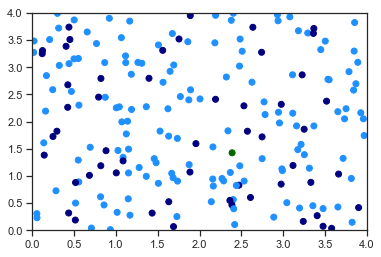

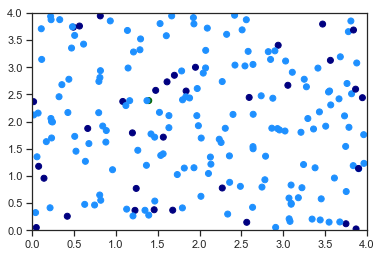

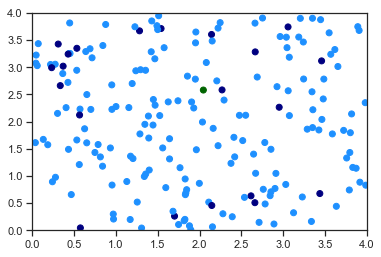

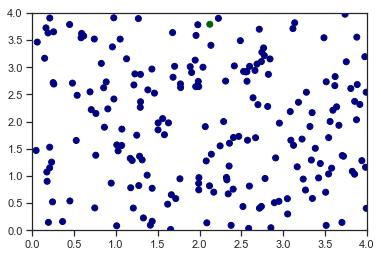

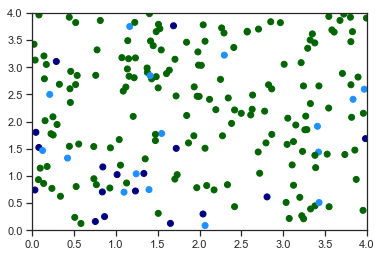

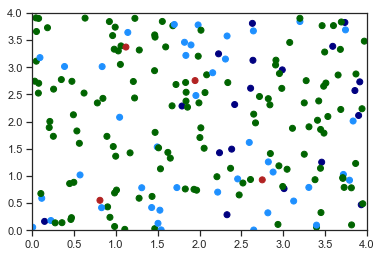

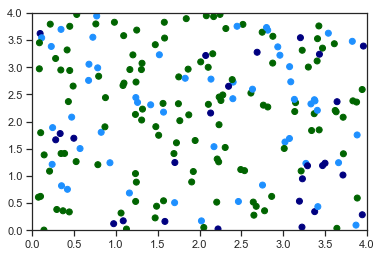

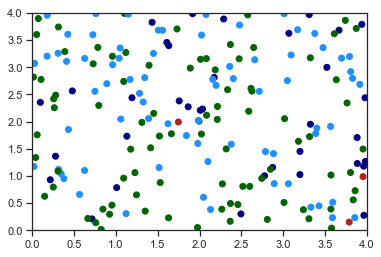

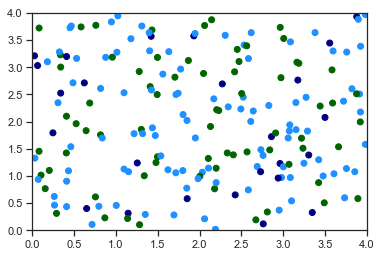

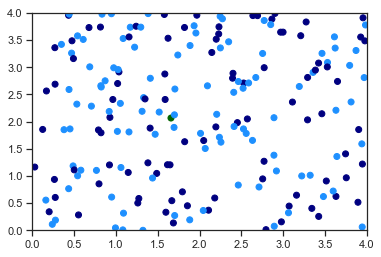

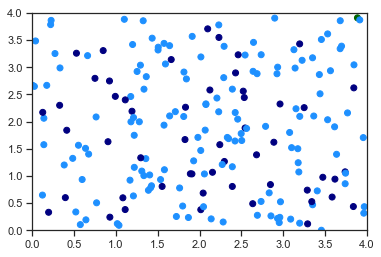

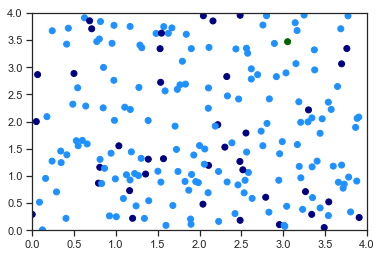

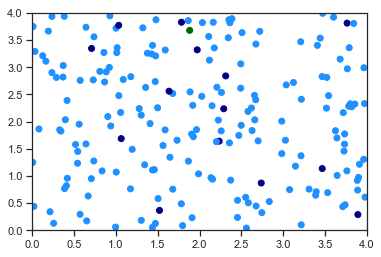

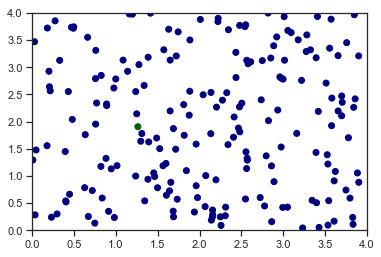

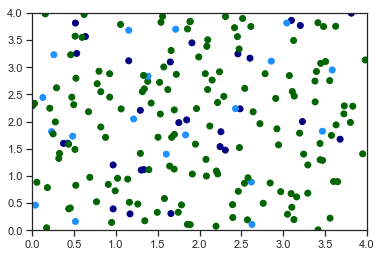

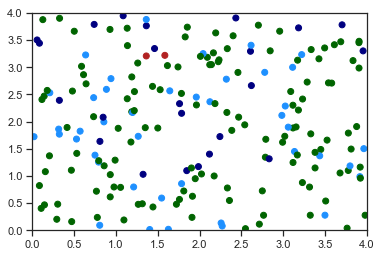

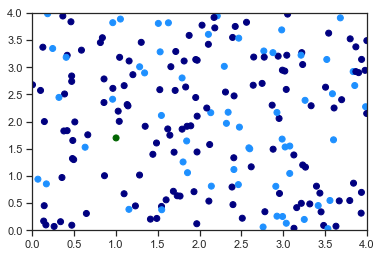

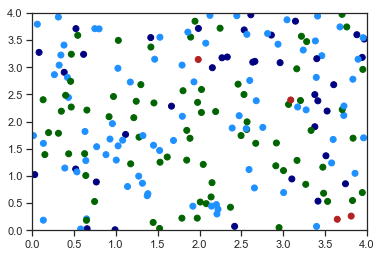

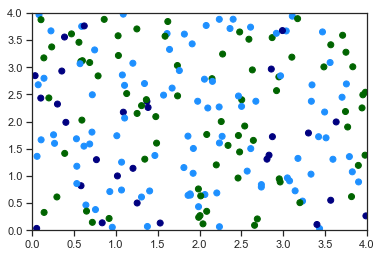

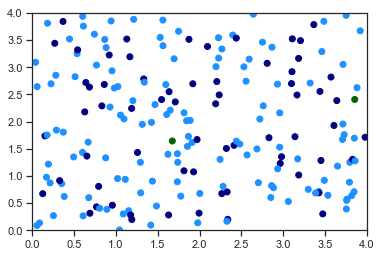

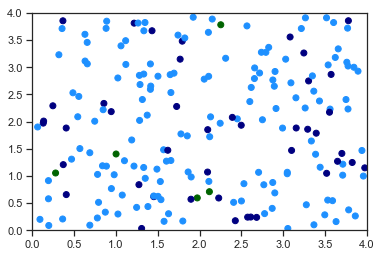

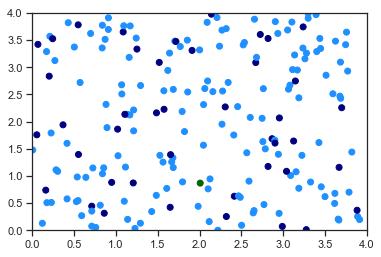

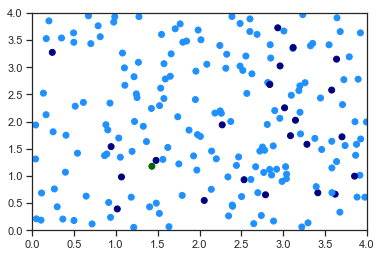

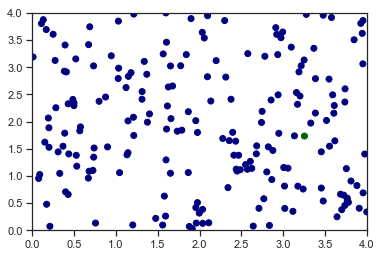

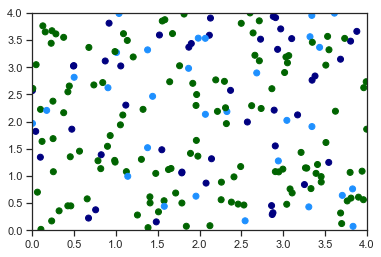

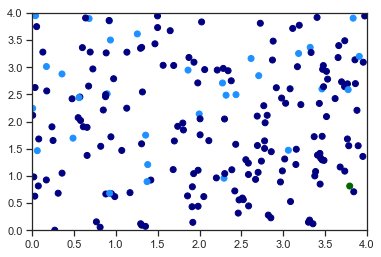

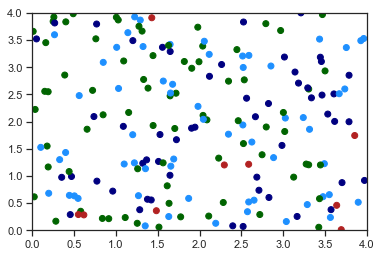

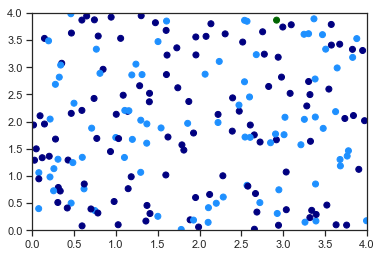

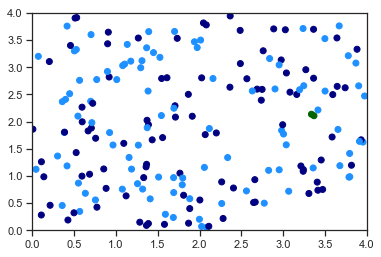

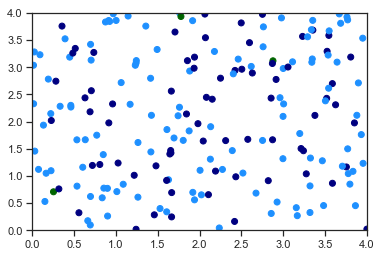

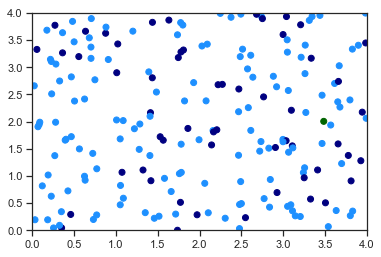

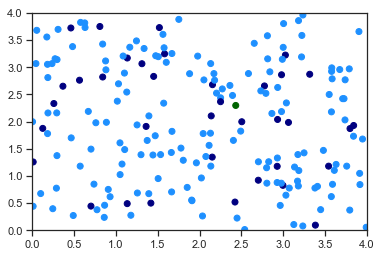

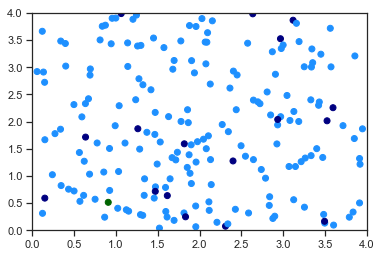

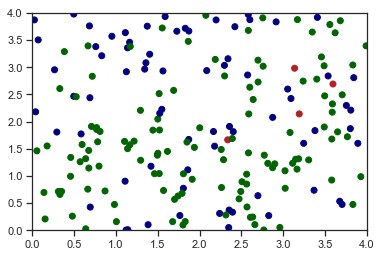

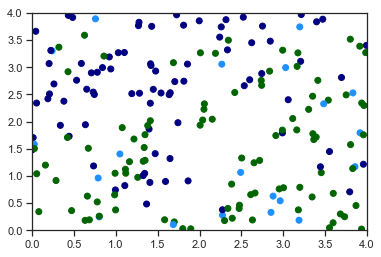

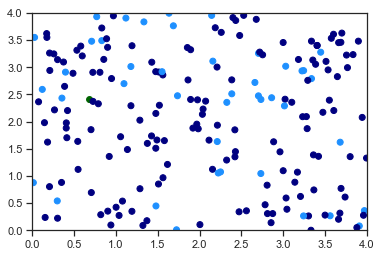

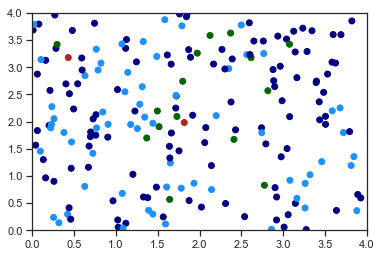

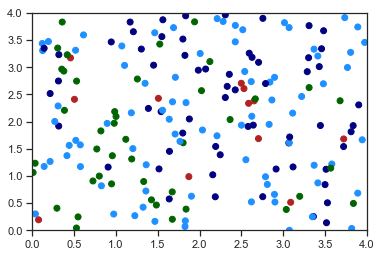

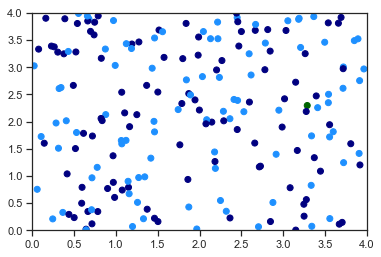

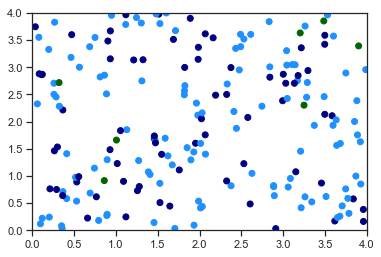

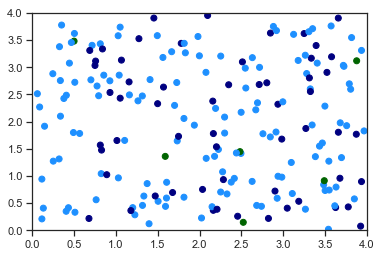

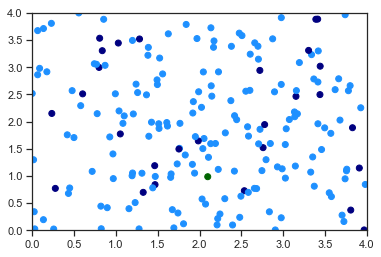

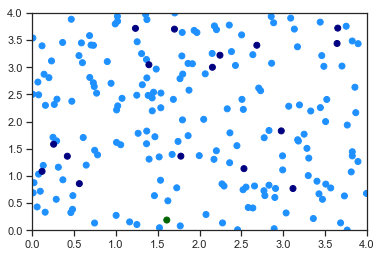

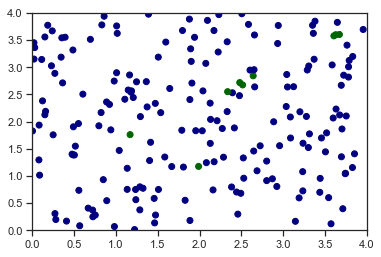

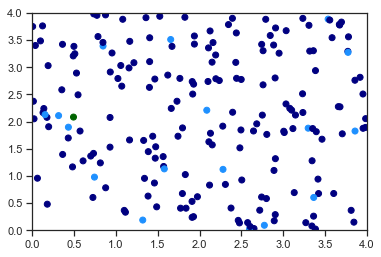

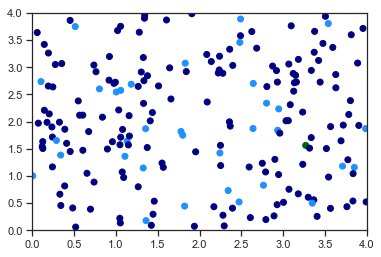

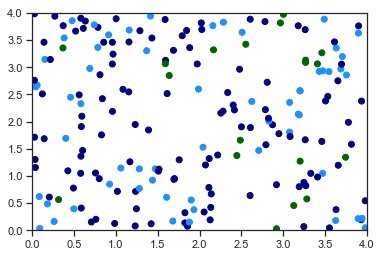

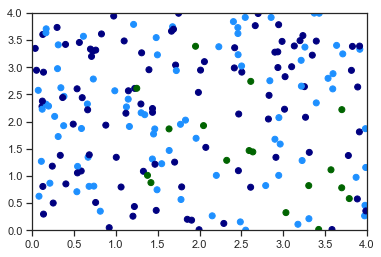

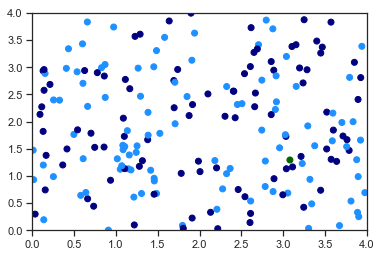

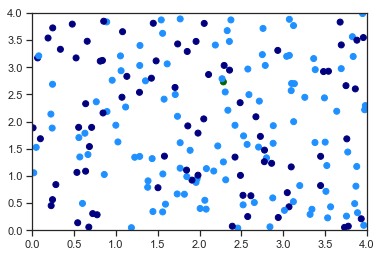

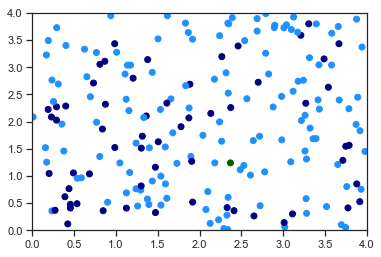

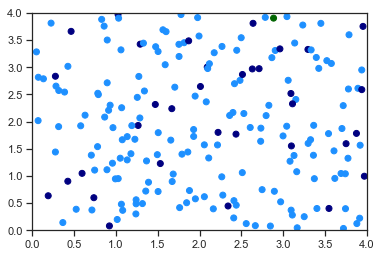

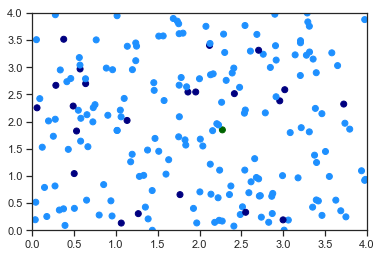

In [3]:
# Fixing random state for reproducibility
np.random.seed(42)
# Initialize file
f = open('all_conditions_1.csv', 'w')
f.write('# 2020-04-08, Benjamin Adam Catching\n')
f.write('# Data from simulation of 200 agents with various levels of sheltering or mask usage\n')
f.write('time,percent sheltering,percent wearing masks,infected,recovered,infected with mask,susceptible with mask\n')
for g in range(10):
    for h in range(10):
        print(g, h)
        
        # Define the current condition (g = percent sheltering, h = percent masked)
        
        # Number of steps
        N_steps = 200
        # Number of agents
        n_agents = 200
        # Set delta t
        dt = .1
        # Set velocity
        velo = .2
        # Set percent of sheltering in place
        per_shelt = round(g * .1, 1)
        # Set boundaries
        xboundaries = [0, 4]
        yboundaries = [0, 4]
        xmax, ymax = xboundaries[1], yboundaries[1]

        # Define the figure
        fig = plt.figure()
        ax = plt.axes(xlim=(0, xmax), ylim=(0, ymax))

        # lists to store x and y axis points 
        agents = np.zeros(n_agents, dtype=[('position', float, 2),
                                          ('velocity', float, 2),
                                          ('color', str, 20),
                                          ('state', str, 20),
                                          ('time', int, 1),
                                          ('mask', bool, 1)])

        # Define the initial positions
        agents['position'] = np.random.uniform(0, 4, (n_agents, 2))

        # Define the initial velocity angles
        init_angles = np.random.uniform(0, 2 * np.pi, n_agents)
        # Get initial x and y velocities from angles
        velocities = np.array([[np.sin(x), np.cos(x)] for x in init_angles]) * velo
        # Get percentage of agents 'sheltering'
        num_shelt = int(per_shelt * n_agents)
        # Make sheltering agents static
        velocities[:num_shelt] = np.zeros((num_shelt, 2))

        # Assign values to agents
        agents['velocity'] = velocities
        agents['color'] = np.array(['Navy'] * n_agents)
        agents['state'] = np.array(['Susceptible'] * n_agents)
        agents['time'] = np.array([0] * n_agents)
        per_mask = [True] * h + [False] * (10-h)
        agents['mask'] = np.random.choice(per_mask, 200, replace=True)
        agents['color'][agents['mask'] == True] = 'Dodgerblue'

        # Make the one agent infected
        agents['color'][0] = 'Firebrick'
        agents['state'][0] = 'Infected'
        agents['time'][0] = 1
        agents['mask'][0] = False

        # Initialize the plot
        scatter = ax.scatter(agents['position'][:, 0], agents['position'][:, 1], color=agents['color'])
        # Initialize lists storing number of infected and recovered
        num_infected = [sum(agents['state']=='Infected')]
        num_recovered = [0]

        def update(i):

            # Define the new time
            t = i * dt + dt
            # Iterate over all possible interactions
            for j in range(n_agents):
                if agents['time'][j] != 0:
                    if agents['state'][j] == 'Infected' and agents['time'][j] >= 200:
                        agents['state'][j] = 'Recovered'
                        agents['color'][j] = 'Darkgreen'
                        agents['time'][j] = 0
                    elif agents['state'][j] == 'Infected':
                        agents['time'][j] += 1
                # New displacements (prior velocity times change in time)
                deltax_temp = dt * agents['velocity'][j, 0]
                deltay_temp = dt * agents['velocity'][j, 1]
                # New positions
                x = agents['position'][j, 0] + deltax_temp
                y = agents['position'][j, 1] + deltay_temp
                # Compute new velocity
                vx_temp = deltax_temp / dt
                vy_temp = deltay_temp / dt

                # Add interaction
                for k in range(n_agents):
                    # Go through all other agents that could be interacted with
                    if k != j:
                        # Compute components of distance
                        dx = agents['position'][j, 0] - agents['position'][k, 0]
                        dy = agents['position'][j, 1] - agents['position'][k, 1]
                        # Compute distance between agents
                        dist_temp = np.sqrt(dx ** 2 + dy ** 2)
                        # If distance of interaction is closer than both radii, collide
                        if dist_temp <= .05:
                            if agents['state'][j] == 'Infected' and agents['state'][k] == 'Susceptible':
                                if agents['mask'][j] == True and agents['mask'][k] == True:
                                    if np.random.random() >= .85:
                                        agents['state'][k] = 'Infected'
                                        agents['color'][k] = 'Orangered'
                                        agents['time'][k] = 1
                                elif agents['mask'][j] == True and agents['mask'][k] == False:
                                    if np.random.random() >= .95:
                                        agents['state'][k] = 'Infected'
                                        agents['color'][k] = 'Firebrick'
                                        agents['time'][k] = 1
                                elif agents['mask'][j] == False and agents['mask'][k] == False:
                                    agents['state'][k] = 'Infected'
                                    agents['color'][k] = 'Firebrick'
                                    agents['time'][k] = 1
                if x >= xmax:
                    x = 2 * xmax - deltax_temp - agents['position'][j, 0]
                    vx_temp *= -1
                elif x <= 0:
                    x = - deltax_temp - agents['position'][j, 0]
                    vx_temp *= -1
                elif y >= ymax:
                    y = 2 * ymax - deltay_temp - agents['position'][j, 1]
                    vy_temp *= -1
                elif y <= 0:
                    y = - deltay_temp - agents['position'][j, 1]
                    vy_temp *= -1

                agents['position'][j] = np.array([x, y])
                agents['velocity'][j, 0] = vx_temp
                agents['velocity'][j, 1] = vy_temp

                # Update the scatter plot, with the new colors and positions
                scatter.set_color(agents['color'])
                scatter.set_offsets(agents['position'])
            temp_infected = sum(agents['state']=='Infected')
            num_infected.append(temp_infected)
            temp_recovered = sum(agents['state']=='Recovered')
            num_recovered.append(temp_recovered)
            temp_infect_mask = sum(agents[agents['mask']==True]['state'] == 'Infected')
            temp_suscept_mask = sum(agents[agents['mask']==True]['state'] == 'Susceptible')
            temp_write = str(i) + ',' + str(round(g * .1, 1)) + ',' + str(round(h * .1, 1)) + ',' + \
                         str(temp_infected) + ',' + str(temp_recovered) + ',' + str(temp_infect_mask) + \
                         ',' + str(temp_suscept_mask) + '\n'
            #print(temp_write)
            f.write(temp_write)
        animation = FuncAnimation(fig, update, frames=1000, interval=20)
        temp_name = 'baseline_'+ str(h) + '0percent_masked_' + str(g) + '0percent_shelter_1.gif'
        animation.save(temp_name, writer='imagemagick')
f.close()

In [67]:
print(sum(agents[agents['mask']==True]['state'] == 'Susceptible'))
print(sum(agents[agents['mask']==False]['state'] == 'Recovered'))

106
83


In [64]:
agents

array([([1.62917346, 3.71499143], [ 0.07440672,  0.18564385], 'Darkgreen', 'Recovered', 0, False),
       ([3.48584614, 1.56807757], [-0.06199825, -0.19014788], 'Darkgreen', 'Recovered', 0, False),
       ([3.3754489 , 0.93811371], [-0.1261819 , -0.15517129], 'Darkgreen', 'Recovered', 0, False),
       ([1.0017211 , 1.87080237], [-0.17645983, -0.09413781], 'Dodgerblue', 'Susceptible', 0,  True),
       ([2.80842459, 1.19393114], [-0.04635478,  0.19455394], 'Dodgerblue', 'Susceptible', 0,  True),
       ([0.34673855, 3.15799135], [-0.19180189, -0.05667482], 'Dodgerblue', 'Susceptible', 0,  True),
       ([2.93085057, 0.84435286], [ 0.18153231,  0.08394057], 'Dodgerblue', 'Susceptible', 0,  True),
       ([0.84689879, 0.10964995], [-0.15999891,  0.12000145], 'Darkgreen', 'Recovered', 0, False),
       ([2.93018731, 1.54508198], [-0.08299945,  0.18196453], 'Darkgreen', 'Recovered', 0, False),
       ([2.43019137, 3.68997175], [ 0.05683723, -0.19175382], 'Darkgreen', 'Recovered', 0, False)

In [80]:
temp = str(i) + ',' + str(round(g * .1, 1)) + ',' + str(round(h * .1, 1)) + ',' + \
       str(temp_infected) + ',' + str(temp_recovered) + ',', + str(temp_infect_mask) + \
       ',' + str(temp_suscept_mask) + '\n'
print(',' + str(round(g * .1, 1)))

NameError: name 'i' is not defined

In [81]:
',' + str(round(g * .1, 1))

',0.0'

In [4]:
1 - ( .05 * .05)

0.9975